1. Биноминальное распределение 
    * *(N)* - кол-во и *(P)* вероятность успеха
2. Лямбда (Экспоненциальное)
    * *(lambda)* - Константа
1. Геометрическое
    * *(P)* - Вероятность успеха
1. Гипер-геометрическое
    * *(N)* - Всего деталей; *(M)* - Всего деффектный деталей; *(n)* - отобранных деталей;
1. Равномерное 
    * *(A)* - левая граница; *(B)* - правая граница
1. Нормальное Гауса
    * *(alpha)* **??**; *(sigma)* **??**;
1. Коши
    * Пустота, холодна
1. Гамма распределение
    * *(alpha)* **??**; *(lambda)* **??**;

In [5]:
import pandas as pd
import numpy as np

In [4]:
from math import factorial
def Cnk(k, n):
    return factorial(n) / (factorial(n-k) * factorial(k))

In [3]:
from math import exp, sqrt, pi
def binominal(returnProbs = False, inputString = ""):
    if inputString != "":
        N, P = inputString.split()
    else:
        N, P = input("Введите N, P через пробел").split()
    N, P = int(N), float(P)
    if P < 0 or P >= 1: raise ValueError("P not correct")
    Q = 1 - P;
    probs = []
    for k in range(N+1):
        probs.append(Cnk(k, N) * P**k * Q**(N-k))
    if returnProbs: return (probs, range(N+1))
    return pd.DataFrame(probs, columns=['P']).plot()

def exponental(returnProbs = False, inputString = ""):
    if inputString != "":
        N, lam = inputString.split()
    else:
        N, lam = input("Введите N, lam через пробел").split()
    N, lam = int(N), float(lam)
    if lam < 0 or lam >= 1: raise ValueError("Lambda not correct")
    probs = []
    for k in range(N+1):
        probs.append(lam * exp(-lam*k))
    if returnProbs: return (probs, range(N+1))
    return pd.DataFrame(probs, columns=['P']).plot()

def geometric(returnProbs = False, inputString = ""):
    if inputString != "":
        N, P = inputString.split()
    else:
        N, P = input("Введите N, P через пробел").split()
    N, P = int(N), float(P)
    Q = 1 - P;
    if P < 0 and P >= 1: raise ValueError("P not correct")
    probs = []
    for k in range(1, N+1):
        probs.append(P*Q**(k-1))
    if returnProbs: return (probs, range(1, N+1))
    return pd.DataFrame(probs, columns=['P']).plot()

def giperGeometric(returnProbs = False, inputString = ""):
    if inputString != "":
        N, M, n = inputString.split()
    else:
        N, M, n = input("Введите N, M, n через пробел").split()
    N, M, n = int(N), int(M), int(n)
    if M > N: raise ValueError("M not correct")
    probs = []
    for m in range(min(M,n)+1):
        probs.append((Cnk(m, M) * Cnk(n-m, N-M))/Cnk(n,N))
    if returnProbs: return (probs, range(min(M,n)+1))
    return pd.DataFrame(probs, columns=['P']).plot()

def ravnomernoe(returnProbs = False, inputString = ""):
    if inputString != "":
        N, A, B = inputString.split()
    else:
        N, A, B = input("Введите N, A, B через пробел").split()
    N, A, B = int(N), int(A), int(B)
    if B <= A: raise ValueError("B is bigger than A")
    probs = [1/(B-A+1) for x in range(int(A),int(B)+1)]
    if returnProbs: return (probs, range(int(A),int(B)+1))
    return pd.Series(np.array(probs),  index=range(A,B+1)).plot()

def gause(returnProbs = False, inputString = ""):
    if inputString != "":
        N, alpha, sigma = inputString.split()
    else:
        N, alpha, sigma = input("Введите N, alpha, sigma через пробел").split()
    N, alpha, sigma = int(N), float(alpha), float(sigma)
    probs = []
    for k in range(-N*10, N*10+1):
        probs.append(exp(-((k-alpha)**2)/(2*sigma**2))/(sigma*sqrt(2*pi)))
    if returnProbs: return (probs, [x/10 for x in range(-N*10, N*10+1)])
    return pd.Series(np.array(probs),  index=[x/10 for x in range(-N*10, N*10+1)]).plot()

def gamma(returnProbs = False, inputString = ""):
    if inputString != "":
        N, alpha, lam = inputString.split()
    else:
        N, alpha, lam = input("Введите N, alpha, lam через пробел").split()
    N, alpha, lam = int(N), int(alpha), float(lam)
    if alpha <= 0 or lam <= 0: raise ValueError("alpha or lam below zero")
    probs = []
    for k in range(1, N+1):
        probs.append(
            (lam**alpha * k**(alpha-1) * exp(-lam*k)) / factorial(alpha-1)
            )
    if returnProbs: return (probs, range(1, N+1))
    return pd.Series(np.array(probs)).plot()

def koshi(returnProbs = False, inputString = ""):
    if inputString != "":
        N = int(inputString)
    else:
        N = int(input("Введите N"))
    probs = []
    for k in range(-N, N+1):
        probs.append(
            1/(pi*(1+k**2))
        )
    if returnProbs: return (probs, list(range(-N, N+1)))
    return pd.Series(np.array(probs), index=range(-N, N+1)).plot()

In [2]:
def gistograma(N, raspred, params = "", returnProbs=False):
    arr = [] # N sized
    segments = []
    probs, inds = raspred(returnProbs = True, inputString=params)
    dlina = len(probs)
    segment = int(dlina / N)
    for i in range(N): #0 1 2
        segments.append((i*segment,(i+1)*segment))
        arr.append(np.trapz(probs[i*segment:(i+1)*segment+1]) / segment)
    if returnProbs: return arr
    return pd.Series(arr, index=segments).plot(kind='bar')

def checkMathEx(N, raspred):
    arr = []
    inputString = input("Введите параметры")
    for x in range(1, N+1):
        probs = gistograma(N=x, raspred=raspred, params=inputString, returnProbs=True)
        arr.append(sum(probs)/len(probs))
    return pd.Series(arr).plot()

def MathEx(raspred, params, quant = 1):
    probs, inds = raspred(inputString = params, returnProbs = True)
    ex = 0
    for i in range(len(probs)):
        ex += probs[i] * inds[i]**quant
    return ex

def Disp(raspred, params):
    return MathEx(raspred, params, quant=2) - MathEx(raspred, params, quant=1)**2
    
def checkCPT(N, raspred, inputStr = ""):
    arr = []
    if inputStr == "":
        inputString = input("Введите параметры")
    else:
        inputString = inputStr
    Ex = MathEx(raspred, str(1) + " " + (inputString.split()[1:][0]))
    Ds = Disp(raspred, str(1) + " " + (inputString.split()[1:][0]))
    for x in range(1, N+1):
        params =  str(x) + " " + inputString
        probs = gistograma(x, raspred, inputString, True)
        arr.append((sum(probs) - x * Ex ) / sqrt(x * Ds))
    return pd.Series(arr).plot()

499.99999999999983


<AxesSubplot: >

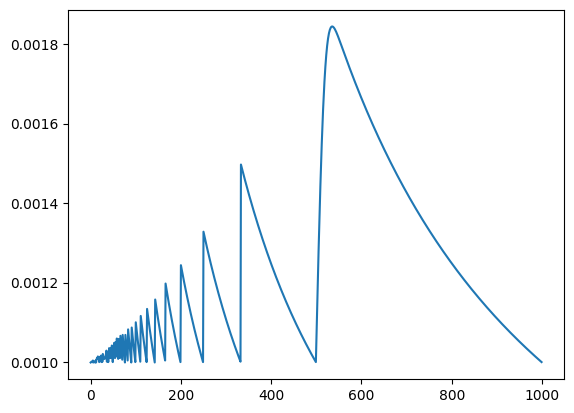

In [54]:
#gause(inputString="10 0 3")
checkMathEx(1000, binominal)

In [96]:
MathEx(binominal, "10 0.5")

5.0

In [9]:
#binominal(returnProbs =  False, inputString="3 0.1")
#gistograma(2, binominal, "10 0.5")
#gistograma(5, gause, "10 0 20")
#gause(inputString="10 0 20")
sum(ravnomernoe(inputString="10 0 9", returnProbs=True)[0])

0.9999999999999999

<AxesSubplot: >

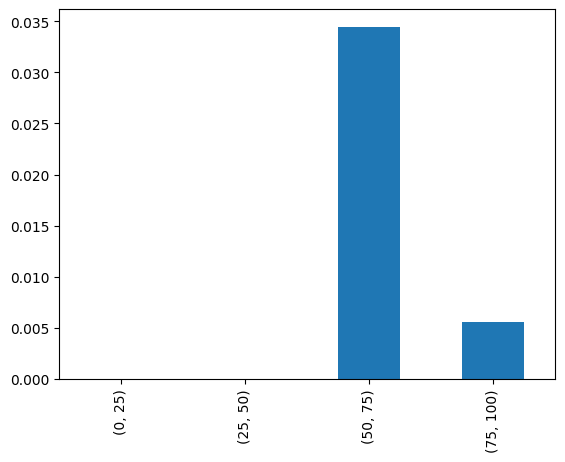

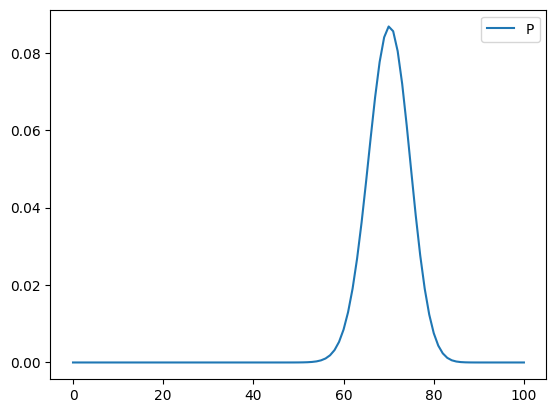

In [8]:
gistograma(4, binominal, "100 0.7")
binominal(inputString="100 0.7")

['0.5']


<AxesSubplot: >

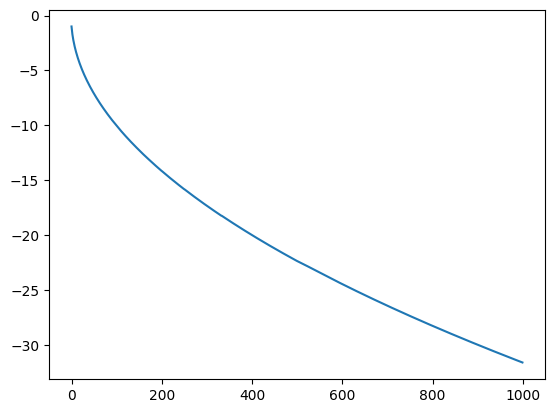

In [65]:
checkCPT(1000, binominal, "1000 0.5")